# Датасеты

## Датасет с данными о погоде в крупных городах

[Перейти на Kaggle](https://www.kaggle.com/datasets/guillemservera/global-daily-climate-data)

### Получим данные о погоде в крупных городах

In [1]:
import pandas as pd

# Чтение Parquet-файла
df = pd.read_parquet('archive/daily_weather.parquet')

# Просмотр первых строк
print(df.head())


  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level_pres_hpa  sunshine_

In [2]:
# Получаем уникальные значения городов
unique_cities = df['city_name'].unique()

# Преобразуем результат в список
unique_cities_list = unique_cities.tolist()


# Выводим уникальные города
print(unique_cities_list)


# Проверяем, есть ли значение в списке
city = 'Moscow'

if city in unique_cities_list:
    print(f"{city} есть в списке.")
else:
    print(f"{city} нет в списке.")


['Asadabad', 'Fayzabad', 'Jalalabad', 'Kunduz', 'Qala i Naw', 'Sheberghan', 'Peshkopi', 'Shkodër', 'Tirana', 'Adrar', 'Algiers', 'Annaba', 'Batna', 'Biskra', 'Bordj Bou Arréridj', 'Béchar', 'Béjaïa', 'Constantine', 'Djelfa', 'Guelma', 'Jijel', 'Laghouat', "M'Sila", 'Mascara', 'Mostaganem', 'Médéa', 'Ouargla', 'Oum El Bouaghi', 'Saïda', 'Sidi Bel Abbès', 'Skikda', 'Sétif', 'Tiaret', 'Tizi Ouzou', 'Tlemcen', 'Tébessa', 'Pago Pago', 'Andorra la Vella', 'Cabinda', 'Luanda', 'Ondjiva', 'The Valley', "Saint John's", 'Buenos Aires', 'Corrientes', 'Córdoba', 'Formosa', 'La Plata', 'La Rioja', 'Mendoza', 'Neuquén', 'Paraná', 'Rawson', 'Resistencia', 'Río Gallegos', 'Salta', 'San Fernando del Valle de Catamarca', 'San Juan', 'San Luis', 'San Miguel de Tucumán', 'San Salvador de Jujuy', 'Santa Rosa', 'Ushuaia', 'Viedma', 'Ashtarak', 'Gavar', 'Gyumri', 'Ijevan', 'Yerevan', 'Oranjestad', 'Adelaide', 'Brisbane', 'Canberra', 'Darwin', 'Hobart', 'Melbourne', 'Perth', 'Sydney', 'Bregenz', 'Graz', 'Inns

### Возьмем данные по городу Москве

#### Общие данные

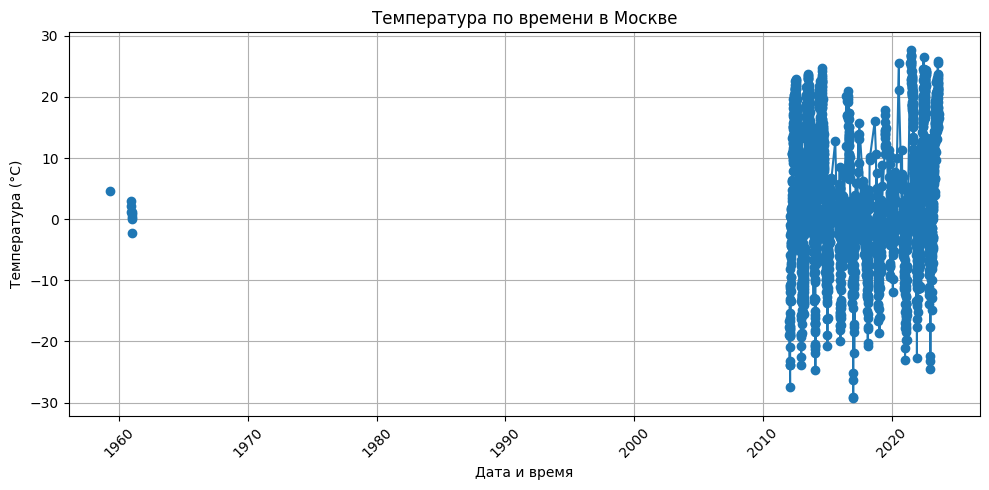

In [3]:
import matplotlib.pyplot as plt

# Фильтрация данных по конкретному городу
city_name = 'Moscow'
filtered_df = df[df['city_name'] == city_name]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Москве')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


#### Модификация данных для дальнейшего удобного анализа

In [4]:
# Дата, введенная пользователем
user_input_date = '2010-01-01'  # Пользователь вводит дату
user_date = pd.to_datetime(user_input_date)

# Город, введенный пользователем
city_name = 'Moscow'  # Пользователь вводит название города

# Фильтрация датафрейма для получения всех дат после введенной даты для указанного города
filtered_dates = df[(df['city_name'] == city_name) & (df['date'] > user_date)]

# Поиск ближайшей даты
if not filtered_dates.empty:
    closest_date = filtered_dates['date'].min()  # Находим минимальную дату среди отфильтрованных
    print(f"Самая ближайшая дата после {user_date.date()} в городе {city_name} - {closest_date.date()}")
else:
    print(f"Нет доступных дат после {user_date.date()} для города {city_name}.")


Самая ближайшая дата после 2010-01-01 в городе Moscow - 2012-01-25


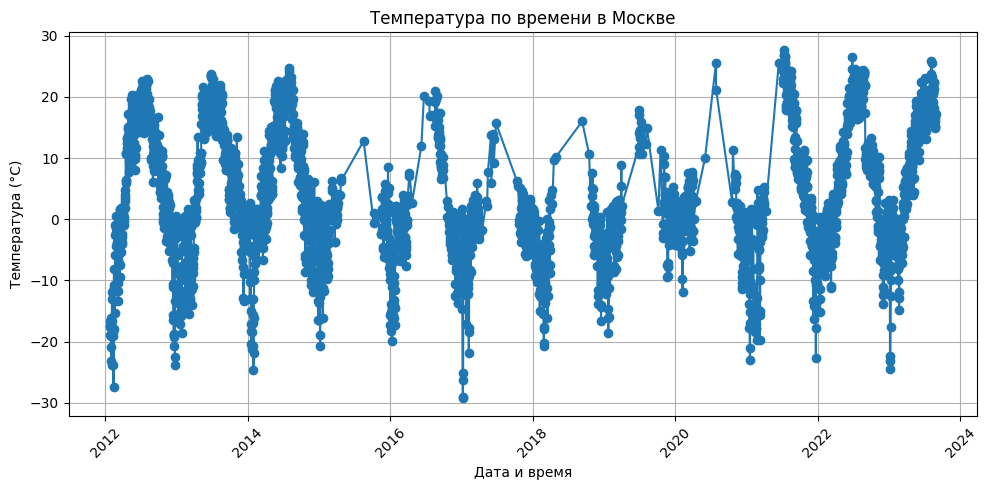

In [5]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Moscow'
start_date = '2012-01-25'  # Начальная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Москве')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


### Анализ данных

#### Данные по городу Москве за 2012-2013 год

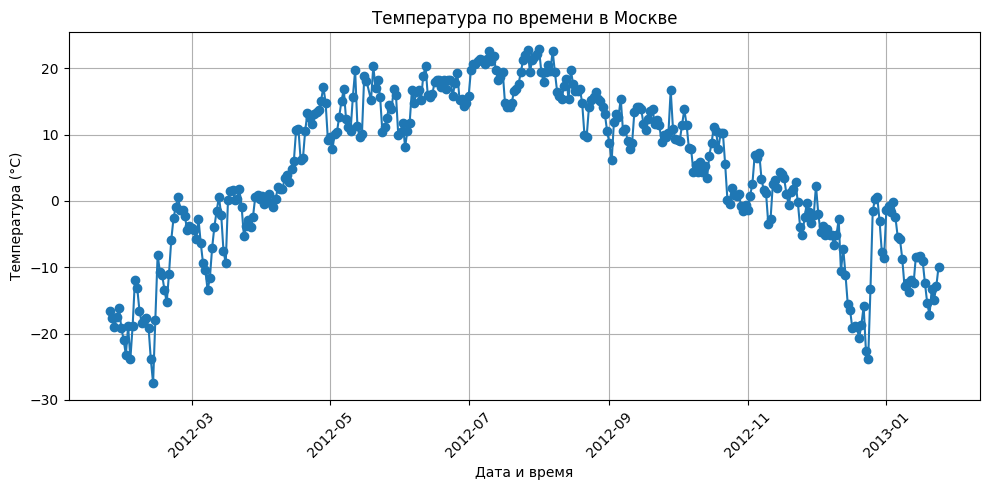

In [6]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Moscow'
start_date = '2012-01-25'  # Начальная дата
end_date = '2013-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Москве')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


In [7]:
# print(filtered_df.head())
print(filtered_df.shape)

(365, 14)


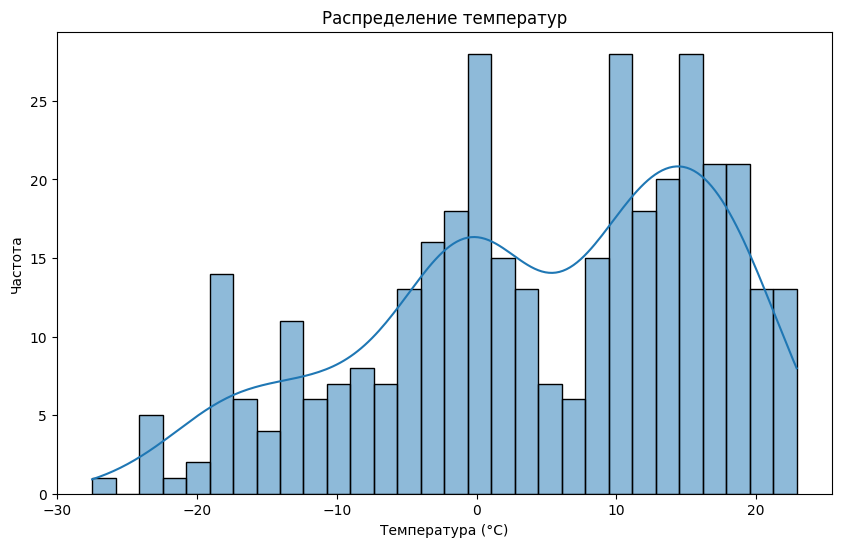

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()


In [9]:
import pandas as pd
from scipy import stats
import numpy as np

# Среднее
mean_temp = avg_temp.mean()

# Медиана
median_temp = avg_temp.median()

# Мода
mode_result = stats.mode(avg_temp)

# Проверяем, возвращается ли массив или скалярное значение
mode_temp = mode_result.mode[0] if isinstance(mode_result.mode, (list, np.ndarray)) else mode_result.mode

# Вывод значений
print(f"Среднее: {mean_temp}")
print(f"Медиана: {median_temp}")
print(f"Мода: {mode_temp if mode_temp is not None else 'Мода не найдена'}")


Среднее: 4.50082191780822
Медиана: 6.2
Мода: 14.8


In [10]:
# Рассчитываем Q1 и Q3
Q1 = avg_temp.quantile(0.25)
Q3 = avg_temp.quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Рассчитываем абсолютное отклонение
absolute_deviation = abs(mean_temp - median_temp)

# Рассчитываем относительное отклонение, используя IQR
relative_deviation = absolute_deviation / IQR

# Вывод результатов
print(f"Межквартильный размах (IQR): {IQR}")
print(f"Абсолютное отклонение между средним и медианой: {absolute_deviation}")
print(f"Относительное отклонение: {relative_deviation:.2%}")

Межквартильный размах (IQR): 18.2
Абсолютное отклонение между средним и медианой: 1.6991780821917803
Относительное отклонение: 9.34%


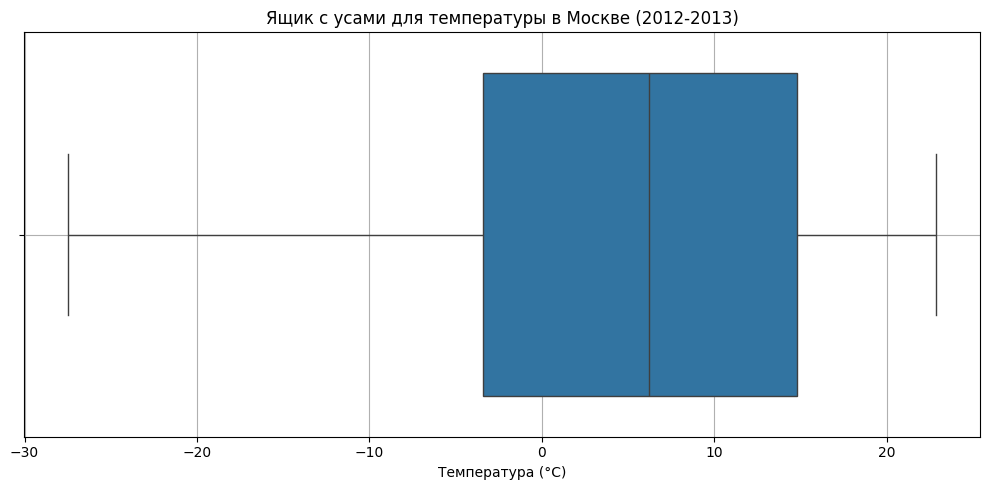

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Фильтрация данных по городу и диапазону дат
city_name = 'Moscow'
start_date = '2012-01-25'  # Начальная дата
end_date = '2013-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Построение ящика с усами
plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_df['avg_temp_c'])

# Настройка графика
plt.title('Ящик с усами для температуры в Москве (2012-2013)')
plt.xlabel('Температура (°C)')
plt.grid(True)

# Показать график
plt.tight_layout()
plt.show()


#### Описание полученных результатов

В данном случае получилось приличное относительное отклонение между медианой и средним - 9.34%, поэтому распределение температуры за 2012-2013 год сложно назвать близким к нормальному. 
То что среднее (4.5°C) меньше медианы (6.2°C) указывает на то, что распределение смещено влево - в сторону более низких температур, отсюда можно сделать вывод, что среди низких температур больше экстремальных значений (явных выбросов в данном случае нет), которые сильно отклоняются от среднего и тянут его вниз - ну или одним словом, что зима в данном периоде была холодной и было много дней с экстремально холодной температурой. То что мода (14.8°C), сильно отличается от среднего и медианы, говорит о том, что за данный период наблюдалась серия теплых дней, которые не типичны для данного региона. Таким образом данное распределение далеко от нормального.

#### Данные по городу Москве за 2013-2014 год

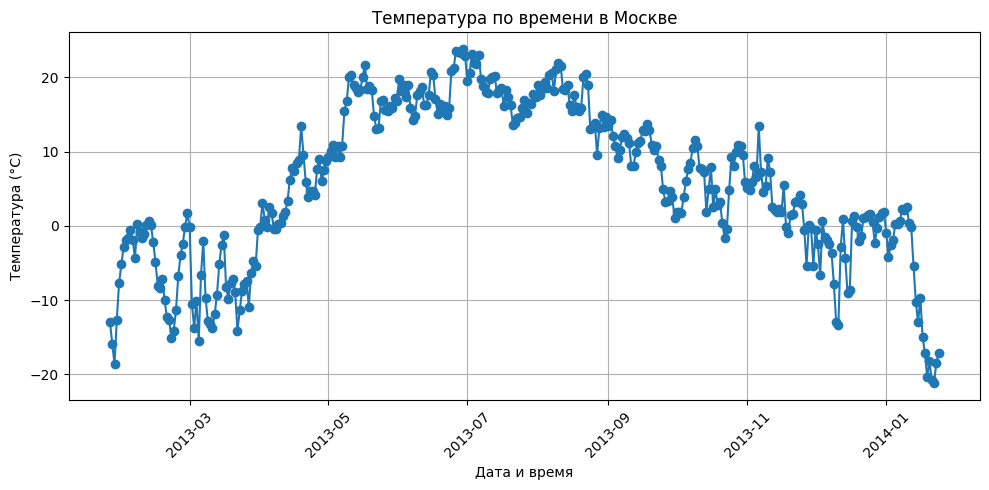

In [12]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Moscow'
start_date = '2013-01-25'  # Начальная дата
end_date = '2014-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Москве')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


In [13]:
# print(filtered_df.head())
print(filtered_df.shape)

(365, 14)


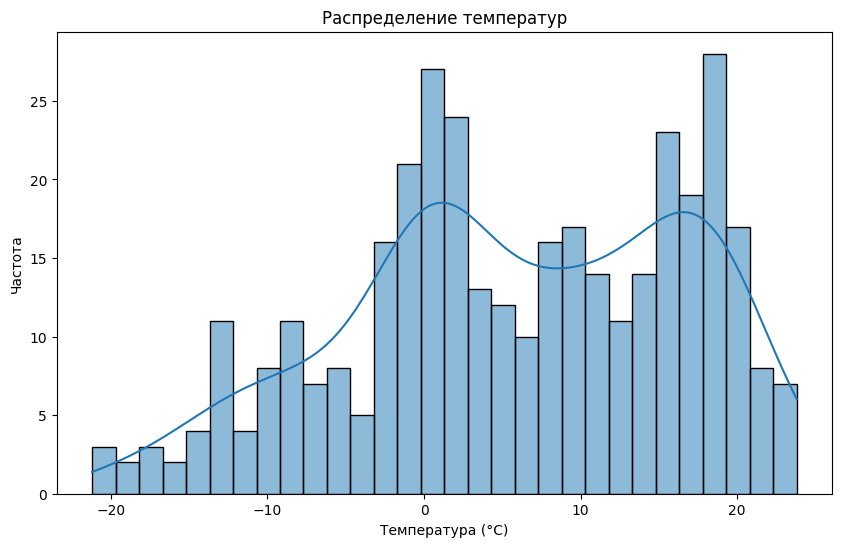

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()


In [15]:
import pandas as pd
from scipy import stats
import numpy as np

# Среднее
mean_temp = avg_temp.mean()

# Медиана
median_temp = avg_temp.median()

# Мода
mode_result = stats.mode(avg_temp)

# Проверяем, возвращается ли массив или скалярное значение
mode_temp = mode_result.mode[0] if isinstance(mode_result.mode, (list, np.ndarray)) else mode_result.mode

# Вывод значений
print(f"Среднее: {mean_temp}")
print(f"Медиана: {median_temp}")
print(f"Мода: {mode_temp if mode_temp is not None else 'Мода не найдена'}")


Среднее: 5.801643835616438
Медиана: 5.9
Мода: 8.1


In [16]:
# Рассчитываем Q1 и Q3
Q1 = avg_temp.quantile(0.25)
Q3 = avg_temp.quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Рассчитываем абсолютное отклонение
absolute_deviation = abs(mean_temp - median_temp)

# Рассчитываем относительное отклонение, используя IQR
relative_deviation = absolute_deviation / IQR

# Вывод результатов
print(f"Межквартильный размах (IQR): {IQR}")
print(f"Абсолютное отклонение между средним и медианой: {absolute_deviation}")
print(f"Относительное отклонение: {relative_deviation:.2%}")

Межквартильный размах (IQR): 16.4
Абсолютное отклонение между средним и медианой: 0.09835616438356265
Относительное отклонение: 0.60%


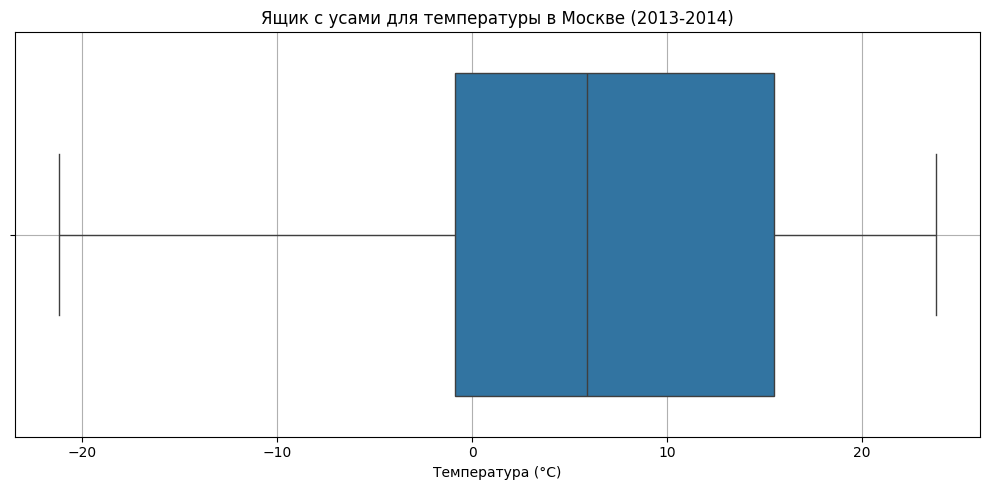

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Фильтрация данных по городу и диапазону дат
city_name = 'Moscow'
start_date = '2013-01-25'  # Начальная дата
end_date = '2014-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Построение ящика с усами
plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_df['avg_temp_c'])

# Настройка графика
plt.title('Ящик с усами для температуры в Москве (2013-2014)')
plt.xlabel('Температура (°C)')
plt.grid(True)

# Показать график
plt.tight_layout()
plt.show()


#### Описание полученных результатов

В данном случае получилось очень маленькое относительное отклонение между медианой и средним - 0.60%, поэтому распределение температуры за 2013-2014 год в целом предварительно можно назвать близким к нормальному. 
Однако мода (8.1°C), отличается от среднего (5.8°C) и медианы (5.9°C), что говорит о том, что за данный период наблюдалась серия теплых дней, которые были теплее чем в среднем. Если проанализировать комплексно эти два факта, что медиана и среднее практически одинаковы, а мода выше - то можно будет сделать вывод, что распределение будет также немного смещено влево (будет иметь небольшой хвост), так как серия теплых дней (на которые указывает мода) уравновешивает некоторые экстремальные низкие температуры (отсюда и получаем среднее практически такое же как и медиана), однако в целом если откинуть этот небольшой хвост слева, можно сказать, что данные распределены симметрично и это очень похоже на нормальное распределение. Таким образом данное распределение близко к нормальному.

#### Данные по городу Москве за 2014-2015 год

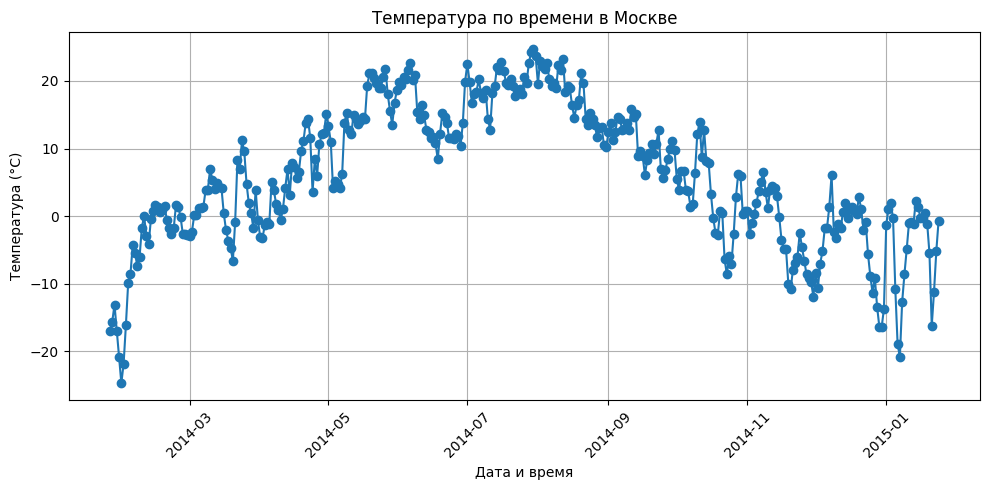

In [18]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Moscow'
start_date = '2014-01-25'  # Начальная дата
end_date = '2015-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Москве')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


In [19]:
# print(filtered_df.head())
print(filtered_df.shape)

(365, 14)


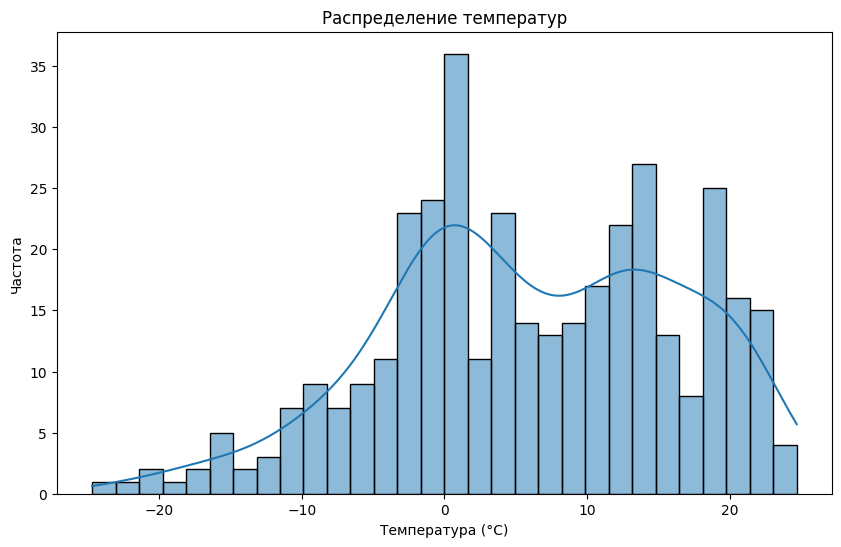

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()


In [21]:
import pandas as pd
from scipy import stats
import numpy as np

# Среднее
mean_temp = avg_temp.mean()

# Медиана
median_temp = avg_temp.median()

# Мода
mode_result = stats.mode(avg_temp)

# Проверяем, возвращается ли массив или скалярное значение
mode_temp = mode_result.mode[0] if isinstance(mode_result.mode, (list, np.ndarray)) else mode_result.mode

# Вывод значений
print(f"Среднее: {mean_temp}")
print(f"Медиана: {median_temp}")
print(f"Мода: {mode_temp if mode_temp is not None else 'Мода не найдена'}")


Среднее: 6.03095890410959
Медиана: 5.6
Мода: 1.4


In [22]:
# Рассчитываем Q1 и Q3
Q1 = avg_temp.quantile(0.25)
Q3 = avg_temp.quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Рассчитываем абсолютное отклонение
absolute_deviation = abs(mean_temp - median_temp)

# Рассчитываем относительное отклонение, используя IQR
relative_deviation = absolute_deviation / IQR

# Вывод результатов
print(f"Межквартильный размах (IQR): {IQR}")
print(f"Абсолютное отклонение между средним и медианой: {absolute_deviation}")
print(f"Относительное отклонение: {relative_deviation:.2%}")

Межквартильный размах (IQR): 15.200000000000001
Абсолютное отклонение между средним и медианой: 0.43095890410959026
Относительное отклонение: 2.84%


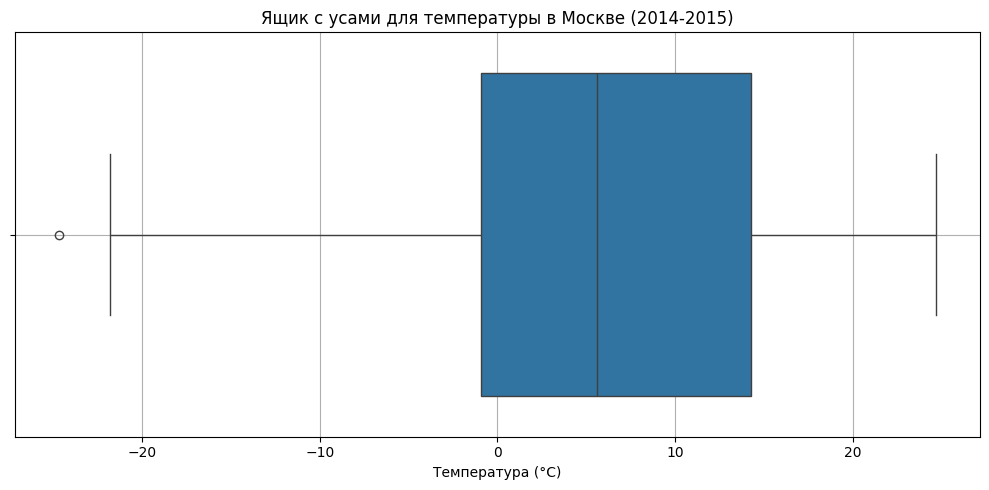

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Фильтрация данных по городу и диапазону дат
city_name = 'Moscow'
start_date = '2014-01-25'  # Начальная дата
end_date = '2015-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Построение ящика с усами
plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_df['avg_temp_c'])

# Настройка графика
plt.title('Ящик с усами для температуры в Москве (2014-2015)')
plt.xlabel('Температура (°C)')
plt.grid(True)

# Показать график
plt.tight_layout()
plt.show()


#### Описание полученных результатов

В данном случае получилось маленькое относительное отклонение между медианой и средним - 2.84%, поэтому распределение температуры за 2014-2015 год предварительно можно назвать недалеким от нормального. 
Однако мода (1.4°C), отличается от среднего (6.03°C) и медианы (5.6°C), что говорит о том, что за данный период наблюдалась серия холодных дней, которые были холоднее чем в среднем. Также здесь наблюдается один выброс среди низких температур, что явно говорит о наличии эксремально холодных дней за данный период. Если проанализировать вместе эти факты, что медиана и среднее практически одинаковы (с небольшим отклонением среднего в сторону теплых дней), а мода ниже, и что есть выброс в низких температурах - то можно будет сделать вывод, что распределение будет иметь большой хвост слева (в низких температурах), и также некие признаки симметрии относительно среднего и медианы. Таким образом данное распределение далеко от нормального.

## Датасет с данными о ценах на машины в США c интернет-аукциона

[Перейти на Kaggle](https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset)

### Получим данные о ценах на машины в США c интернет-аукциона

In [24]:
import pandas as pd

# Укажите путь к вашему файлу
file_path = 'archive/USA_cars_datasets.csv'

# Чтение файла CSV в DataFrame
df = pd.read_csv(file_path)

# Вывод первых 5 строк DataFrame для проверки
print(df.head())


   Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1           1   2899       ford       se  2011  clean vehicle  190552.0   
2           2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3           3  25000       ford     door  2014  clean vehicle   64146.0   
4           4  27700  chevrolet     1500  2018  clean vehicle    6654.0   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  


### Анализ данных

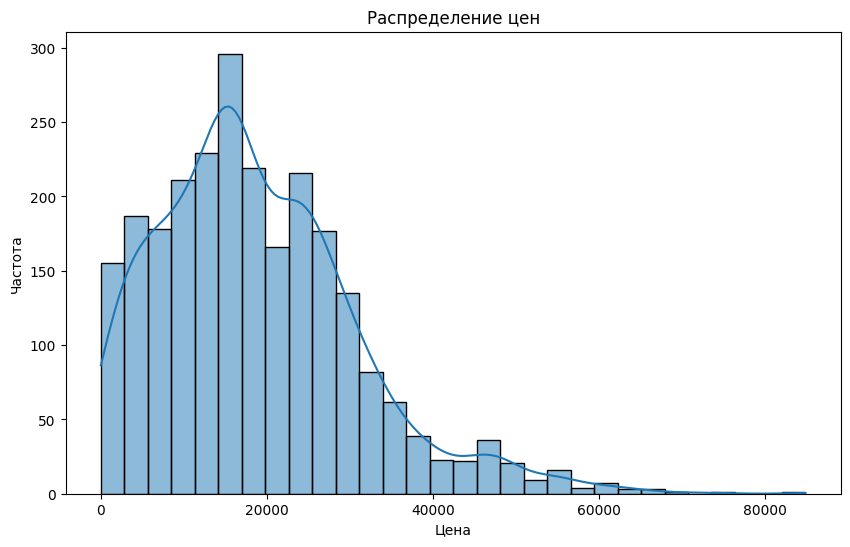

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика распределения цен
plt.figure(figsize=(10, 6))  # Размер графика
sns.histplot(df['price'], bins=30, kde=True)  # kde=True добавляет линию плотности (гладкая кривая)

# Настройки графика
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')

# Показать график
plt.show()

In [26]:
import pandas as pd
from scipy import stats
import numpy as np

# Рассчитаем моду, медиану и среднее для отфильтрованных данных по температуре
price = df['price']

# Среднее
mean_price = price.mean()

# Медиана
median_price = price.median()

# Мода
mode_result = stats.mode(price)

# Проверяем, возвращается ли массив или скалярное значение
mode_price = mode_result.mode[0] if isinstance(mode_result.mode, (list, np.ndarray)) else mode_result.mode

# Вывод значений
print(f"Среднее: {mean_price}")
print(f"Медиана: {median_price}")
print(f"Мода: {mode_price if mode_price is not None else 'Мода не найдена'}")

# # Проверить, все ли значения уникальны
# if price.nunique() == len(price):
#     print("Все значения уникальны.")
# else:
#     print("Некоторые значения повторяются.")

# # Находим минимальную цену
# min_price = price.min()

# # Вывод минимальной цены
# print(f"Минимальная цена: {min_price}")

Среднее: 18767.671468587436
Медиана: 16900.0
Мода: 0


In [27]:
# Рассчитываем Q1 и Q3
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Рассчитываем абсолютное отклонение
absolute_deviation = abs(mean_price - median_price)

# Рассчитываем относительное отклонение, используя IQR
relative_deviation = absolute_deviation / IQR

# Вывод результатов
print(f"Межквартильный размах (IQR): {IQR}")
print(f"Абсолютное отклонение между средним и медианой: {absolute_deviation}")
print(f"Относительное отклонение: {relative_deviation:.2%}")

Межквартильный размах (IQR): 15355.5
Абсолютное отклонение между средним и медианой: 1867.6714685874358
Относительное отклонение: 12.16%


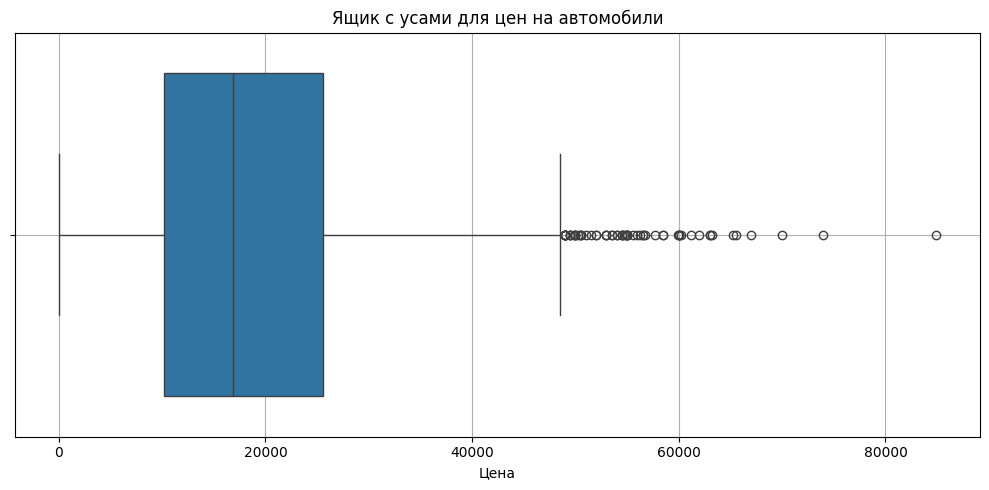

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Построение ящика с усами для цен на автомобили
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])  # Предполагаем, что столбец с ценами называется 'price'

# Настройка графика
plt.title('Ящик с усами для цен на автомобили')
plt.xlabel('Цена')
plt.grid(True)

# Показать график
plt.tight_layout()
plt.show()


### Описание полученных результатов

В данном наборе данных относительное отклонение между медианой и средним существенное - 12.16%, что с самого начала указывает нам на ассиметричность распределения. Среднее (18,767) выше чем медиана (16,900), что предварительно указывает на наличие дорогих моделей в выборке, которые смещают среднее в большую сторону. И действительно, в данной выборке обнаружено очень большое количество выбросов (дорогих автомобилей). Значение моды (0) 
в данном случае связано с тем, что в датасете также указывались машины, которы сдавались в утиль, и у них как правило была выставлена цена 0 - в нашем случае нам эта информация только может сказать, что таких предложений было много. Если объединить все факты вместе, то получим, что распределение будет иметь очень большой хвост справа (из-за большого количества выбросов в виде дорогих автомобилей) и также из-за существенного отклонения практически не будет иметь никакие признаки симметричности вблизи среднего и медианы. Таким образом данное распределение далеко от нормального.

## Датасет с данными о ценах на аренду недвижимости в крупных городах Индии

[Перейти на Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data)

### Получим данные о ценах на аренду недвижимости в крупных городах Индии

In [29]:
import pandas as pd

# Укажите путь к вашему файлу
file_path = 'archive/House_Rent_Dataset.csv'

# Чтение файла CSV в DataFrame
df = pd.read_csv(file_path)

# Вывод первых 5 строк DataFrame для проверки
print(df.head())


    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

### Анализ данных

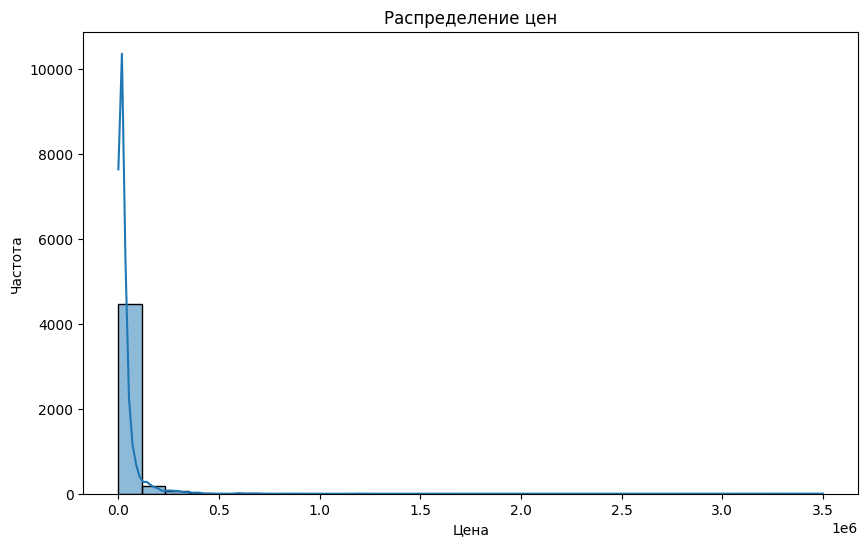

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика распределения цен
plt.figure(figsize=(10, 6))  # Размер графика
sns.histplot(df['Rent'], bins=30, kde=True)  # kde=True добавляет линию плотности (гладкая кривая)

# Настройки графика
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')

# Показать график
plt.show()

In [31]:
import pandas as pd
from scipy import stats
import numpy as np

# Рассчитаем моду, медиану и среднее для отфильтрованных данных по температуре
price = df['Rent']

# Среднее
mean_price = price.mean()

# Медиана
median_price = price.median()

# Мода
mode_result = stats.mode(price)

# Проверяем, возвращается ли массив или скалярное значение
mode_price = mode_result.mode[0] if isinstance(mode_result.mode, (list, np.ndarray)) else mode_result.mode

# Вывод значений
print(f"Среднее: {mean_price}")
print(f"Медиана: {median_price}")
print(f"Мода: {mode_price if mode_price is not None else 'Мода не найдена'}")

# # Проверить, все ли значения уникальны
# if price.nunique() == len(price):
#     print("Все значения уникальны.")
# else:
#     print("Некоторые значения повторяются.")

# # Находим минимальную цену
# min_price = price.min()

# # Вывод минимальной цены
# print(f"Минимальная цена: {min_price}")

Среднее: 34993.45132743363
Медиана: 16000.0
Мода: 15000


In [32]:
# Рассчитываем Q1 и Q3
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Рассчитываем абсолютное отклонение
absolute_deviation = abs(mean_price - median_price)

# Рассчитываем относительное отклонение, используя IQR
relative_deviation = absolute_deviation / IQR

# Вывод результатов
print(f"Межквартильный размах (IQR): {IQR}")
print(f"Абсолютное отклонение между средним и медианой: {absolute_deviation}")
print(f"Относительное отклонение: {relative_deviation:.2%}")

Межквартильный размах (IQR): 23000.0
Абсолютное отклонение между средним и медианой: 18993.451327433628
Относительное отклонение: 82.58%


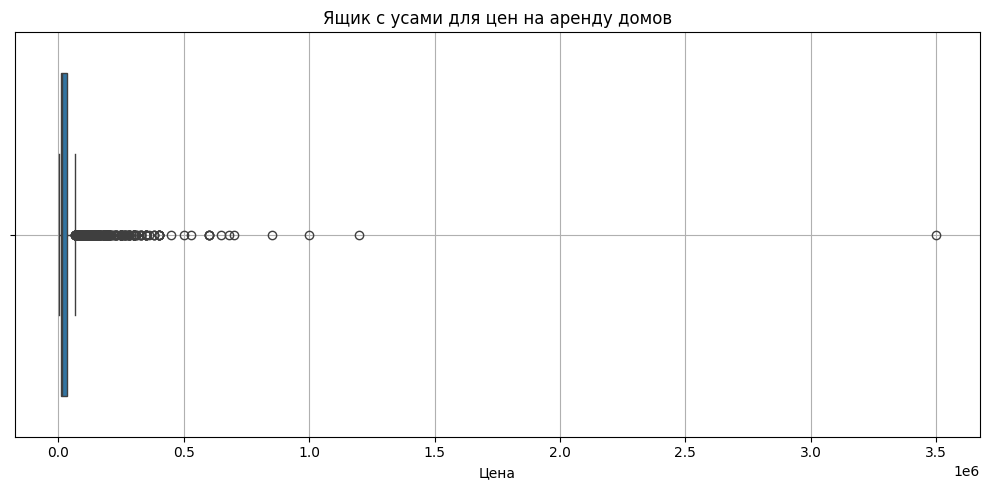

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Построение ящика с усами для цен на автомобили
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Rent'])  # Предполагаем, что столбец с ценами называется 'price'

# Настройка графика
plt.title('Ящик с усами для цен на аренду домов')
plt.xlabel('Цена')
plt.grid(True)

# Показать график
plt.tight_layout()
plt.show()


### Описание полученных результатов

В данном наборе данных относительное отклонение между медианой и средним просто огромное - 82.58%, что с самого начала указывает нам на очень сильную ассиметричность распределения. Среднее (34,993) в два раза выше чем медиана (16,000), что предварительно указывает на наличие очень дорогих апартаментов для аренды в выборке. Как и следовало ожидать, в данной выборке обнаружено колоссальное количество выбросов (дорогих апартаментов). 
Значение моды (15,000) очень близко к медиане, что указывает на то, что большая часть данных сосредоточена вокруг одной ценовой категории. Если объединить все факты вместе, то получим, что распределение будет иметь просто огромнейший хвост справа (из-за огромного количества выбросов в виде дорогих апартаментов) и также из-за огромного отклонения не будет иметь никаких признаков симметричности вблизи среднего и медианы. Таким образом данное распределение очень далеко от нормального.

## Ремарка про равномерное распределение

Анализировать данные с равномерным распределением не имеет зачастую никакого практического смысла - потому что и так понятно, что вероятности распределяются равномерно по фиксированным значениям (например, то какой гранью упадет игральный кубик), такие данные не могут в себе содержать какой-то новой полезной информации, как с случае с более сложными распределениями, например - нормальным или экспоненциальным.